# Assignment 3(due on 11/22)

## Student:李普双（12332294），Gtihub：LPS668899
## 批改人：吴昊天


## 得分：60/60

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

## 1. Niño 3.4 index

In [65]:
# Open a netCDF4 file
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

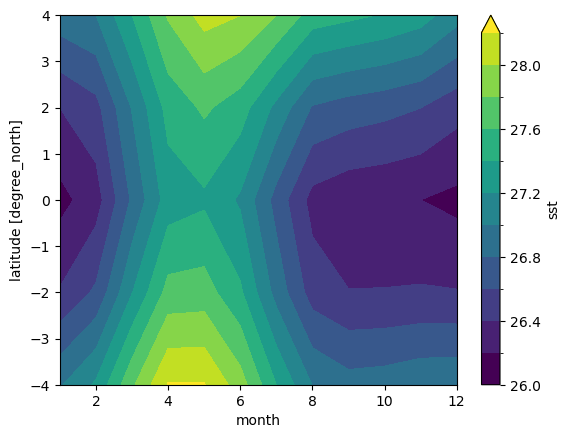

In [66]:
# PS3.1.1 climatology 
#代码思路：先导入文件，在用slice从中选取Niño 3.4 区域（5N-5S, 170W-120W）， 170W-120W转化为360°格式，应该为360-170和360-140，为190°-240°即
# ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240))
# 再按月对其进行分组，继而求每组的平均值，即可获得climatology
# 再用原本的数据减去平均值，就可以获得global mean anomalies，最后进行绘图。

dn=ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240))  #170W-140W换算成360°格式，应该为360-170和360-140，为190°-240°
dn
# Calculate the climatology 
sst_clim = dn.groupby('time.month').mean()
sst_clim
# Plot zonal mean climatology
sst_clim.mean(dim='lon').transpose().plot.contourf(levels=12, robust=True)

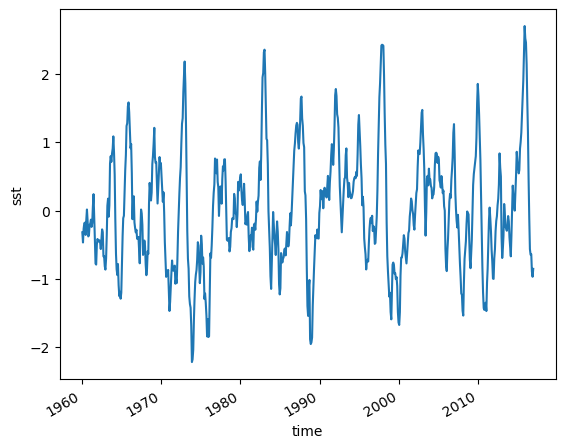

In [67]:
# PS3.1.1 anomaly 
# Group data by month
group_data = dn.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
sst_anom = group_data - group_data.mean(dim='time')
sst_anom
# Plot global mean anomalies
sst_anom.mean(dim=['lat', 'lon']).plot()

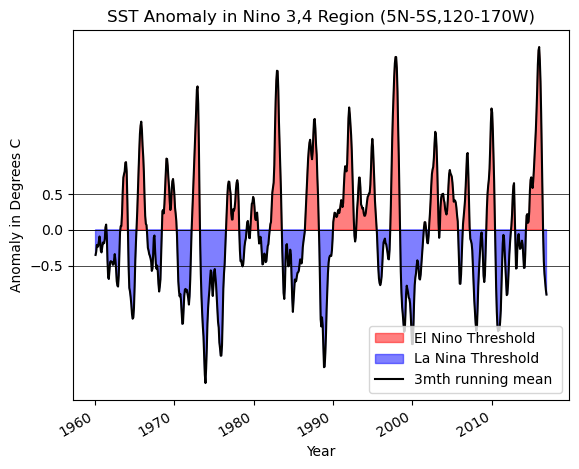

In [68]:
# PS3.1.2 3mth running mean
# 代码思路：先求anomalies的三月滑动平均值，可以采用rolling函数实现该功能rolling_mean = sst_anom.rolling(time=3, center=True).mean()
# 再求整个区域的平均值，最后绘制滑动平均曲线并填充其与x轴之间的距离

#计算3月滑动平均值
rolling_mean = sst_anom.rolling(time=3, center=True).mean()

#计算全区的滑动平均值的平均值
rolling_mean_values = rolling_mean.mean(dim=['lat', 'lon'])

fig, ax = plt.subplots()

#填充曲线到x轴之间区域
ax.fill_between(rolling_mean.time.values, rolling_mean_values, where=rolling_mean_values >= 0,
                color='red', interpolate=True, alpha=0.5,label='El Nino Threshold')
ax.fill_between(rolling_mean.time.values, rolling_mean_values, where=rolling_mean_values < 0,
                color='blue', interpolate=True, alpha=0.5, label='La Nina Threshold')

#绘制滑动平均曲线
rolling_mean_values.plot(ax=ax,color='black', label='3mth running mean ')

ax.axhline(0, color='black',linewidth=0.5)

# 添加纵坐标网格线
ax.yaxis.grid(True)
ax.yaxis.grid(which='major', color='black', linestyle='-', linewidth=0.5)
ax.set_yticks([-0.5, 0, 0.5])

# 图例设置在右下角
ax.legend(loc='lower right')
plt.title('SST Anomaly in Nino 3,4 Region (5N-5S,120-170W)')
plt.xlabel('Year') 
plt.ylabel('Anomaly in Degrees C')

plt.show()

### 1.1 从海温时间序列中减去气候学得到异常，绘制了温度统计图。
### 1.2 绘制了相近的图像。
### 得分：21/20

### =============================

## 2. Earth’s energy budget

In [69]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
# Open a netCDF4 file
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

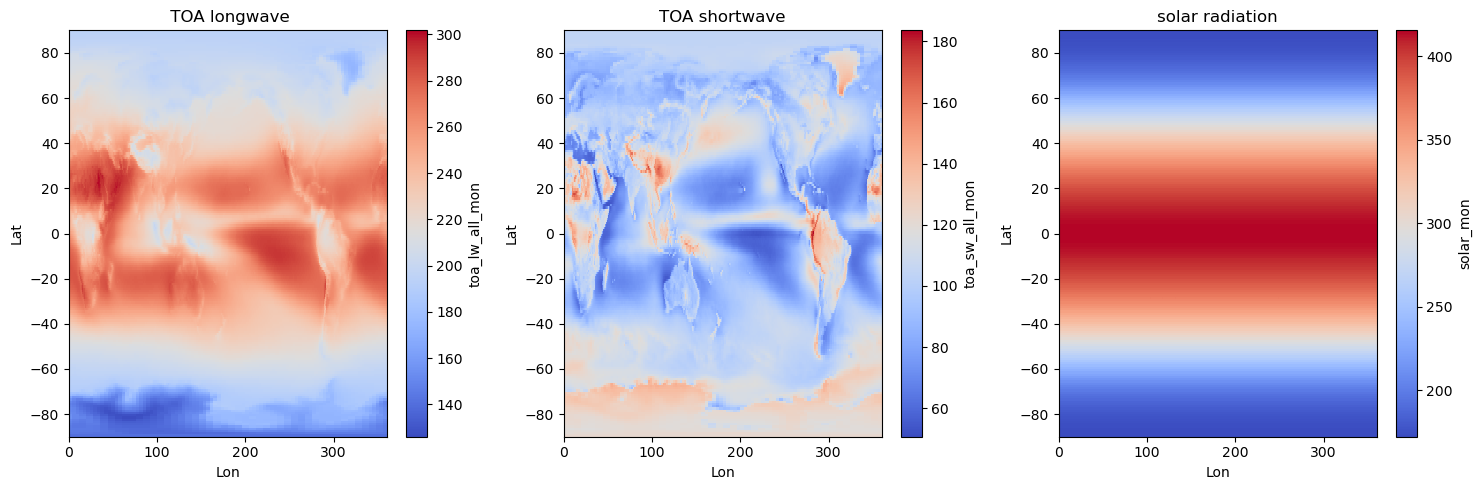

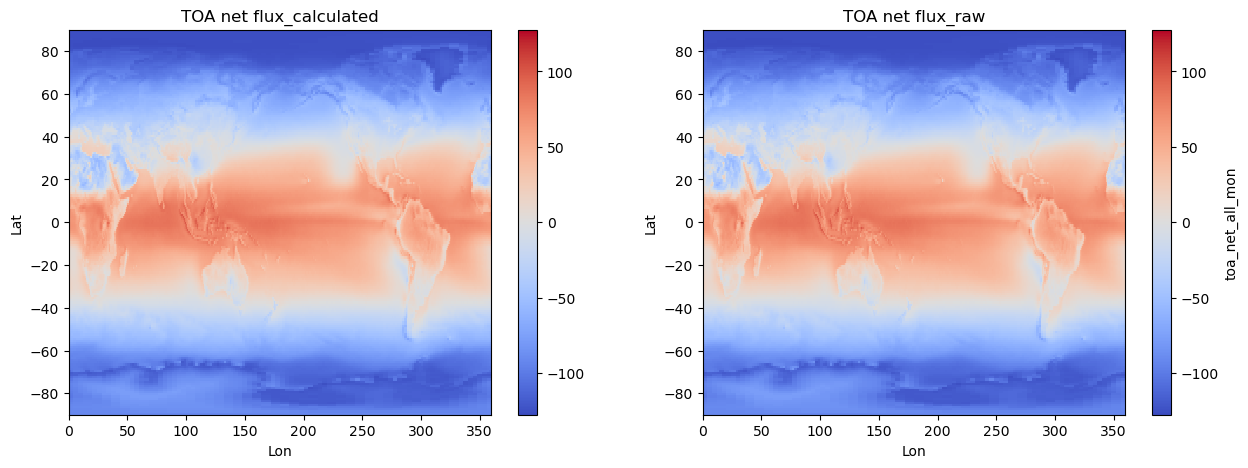

In [72]:
# PS3.2.1
# 代码思路
# 先将下载的文件导入，再提取相应的变量TOA 长波辐射、TOA 短波辐射、TOA net flux、太阳辐射，先绘制长波辐射、短波辐射、太阳辐射的2D图
# 再用TOA net flux=太阳辐射-TOA 长波辐射- TOA 短波辐射，可以得到计算出的TOA net flux，绘制2D图，并与从文件中提取的TOA net flux进行对比。
# 计算出的TOA net flux与文件中观测到的TOA net flux基本一致。


toa_lw_all = ds['toa_lw_all_mon']  # TOA 长波辐射
toa_sw_all = ds['toa_sw_all_mon']  # TOA 短波辐射
toa_net_all = ds['toa_net_all_mon'] #net flux
solar = ds['solar_mon']  # 太阳辐射

toa_lw_all_mean = toa_lw_all.mean(dim='time')
toa_sw_all_mean = toa_sw_all.mean(dim='time')
toa_net_all_mean = toa_net_all.mean(dim='time')
solar_mean = solar.mean(dim='time')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
toa_lw_all_mean.plot(cmap='coolwarm')
plt.title(' TOA longwave')
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.subplot(1, 3, 2)
toa_sw_all_mean.plot(cmap='coolwarm')
plt.title('TOA shortwave')
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.subplot(1, 3, 3)
solar_mean.plot(cmap='coolwarm')
plt.title('solar radiation')
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.tight_layout()
plt.show()

# 通过将 TOA 长波和短波辐射与太阳辐射相加来计算 TOA net flux
toa_net_flux = solar_mean - toa_lw_all_mean - toa_sw_all_mean  

# 绘制 TOA 净辐射并通过可视化进行比较
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
toa_net_flux.plot(cmap='coolwarm')#计算出的net
plt.title('TOA net flux_calculated')
plt.xlabel('Lon')
plt.ylabel('Lat')

plt.subplot(1, 2, 2)
toa_net_all_mean.plot(cmap='coolwarm')#文件中的net
plt.title('TOA net flux_raw')
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.show()

#计算出的TOA net flux与文件中观测到的TOA net flux基本一致。

In [93]:
# PS3.2.2
#先计算每个单元网格的面积，在计算每个每个数据时间上的均值，二者相乘再除以总的面积，得到单位面积上的数据通量。
# 在网格计算上要在末尾添加额外的差分以匹配网格大小 inspired by 朱煜光同学
# 地球半径（以米为单位）
earth_radius = 6371000
# 计算纬度和经度的差分（以弧度为单位）
dlat_rad = np.deg2rad(np.diff(ds['lat'].values))
dlon_rad = np.deg2rad(np.diff(ds['lon'].values))
# 在末尾添加额外的差分，以匹配网格单元的大小
dlat_rad = np.append(dlat_rad, dlat_rad[-1])
dlon_rad = np.append(dlon_rad, dlon_rad[-1])
# 计算每个纬度的权重
lat_edges = np.deg2rad(ds['lat'].values) - dlat_rad / 2
lat_edges = np.append(lat_edges, lat_edges[-1] + dlat_rad[-1])  # Add the last edge
weights = np.sin(lat_edges[1:]) - np.sin(lat_edges[:-1])
# 计算每个纬度的网格面积
grid_area_lat = earth_radius**2 * dlat_rad * weights
# 计算每个单元的总网格面积
grid_area = np.outer(grid_area_lat, dlon_rad)
# 计算所需变量的时间平均值
toa_lw_mean = toa_lw_all.mean(dim='time')
toa_sw_mean = toa_sw_all.mean(dim='time')
solar_mean = solar.mean(dim='time')
# 假设 grid_area 是一个 NumPy 数组，且 ds['lat'] 和 ds['lon'] 是包含纬度和经度的数据
grid_area_da = xr.DataArray(grid_area, dims=["lat", "lon"], coords={"lat": ds['lat'], "lon": ds['lon']})
# 使用 grid_area_da 来加权平均
incoming_solar_mean = (solar_mean * grid_area_da).sum(dim=('lon', 'lat')) / grid_area_da.sum()
outgoing_longwave_mean = (toa_lw_mean * grid_area_da).sum(dim=('lon', 'lat')) / grid_area_da.sum()
outgoing_shortwave_mean = (toa_sw_mean * grid_area_da).sum(dim=('lon', 'lat')) / grid_area_da.sum()
print(f"平均入射太阳辐射：{incoming_solar_mean:.2f} W/m^2")
print(f"平均射长波辐射：{outgoing_longwave_mean:.2f} W/m^2")
print(f"平均射短波辐射：{outgoing_shortwave_mean:.2f} W/m^2")

平均入射太阳辐射：340.29 W/m^2
平均射长波辐射：240.27 W/m^2
平均射短波辐射：99.14 W/m^2


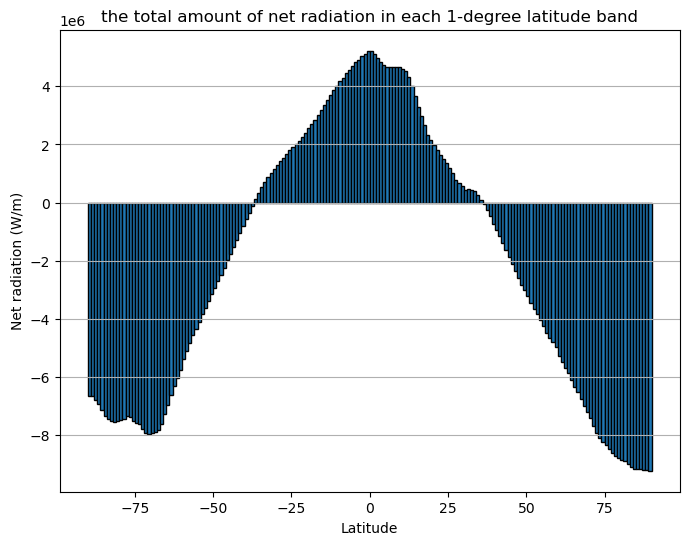

In [74]:
# PS3.2.3
#先提取纬度值，再创建空的数据，用for循环，先选出所有符合纬度等于lat的值，再求和，将其添加到空的数据格，最后进行绘图，Net radiation 单位为(W/m)
latitudes = ds['lat'].values
net_radiation_per_latitude = []

for lat in latitudes:
    data_at_latitude = toa_net_all.sel(lat=lat).values
    total_net_radiation = np.sum(data_at_latitude)
    net_radiation_per_latitude.append(total_net_radiation)

plt.figure(figsize=(8, 6))
plt.bar(latitudes, net_radiation_per_latitude, width=1.0, edgecolor='black')
plt.title('the total amount of net radiation in each 1-degree latitude band')
plt.xlabel('Latitude')
plt.ylabel('Net radiation (W/m)')
plt.grid(axis='y')
plt.show()

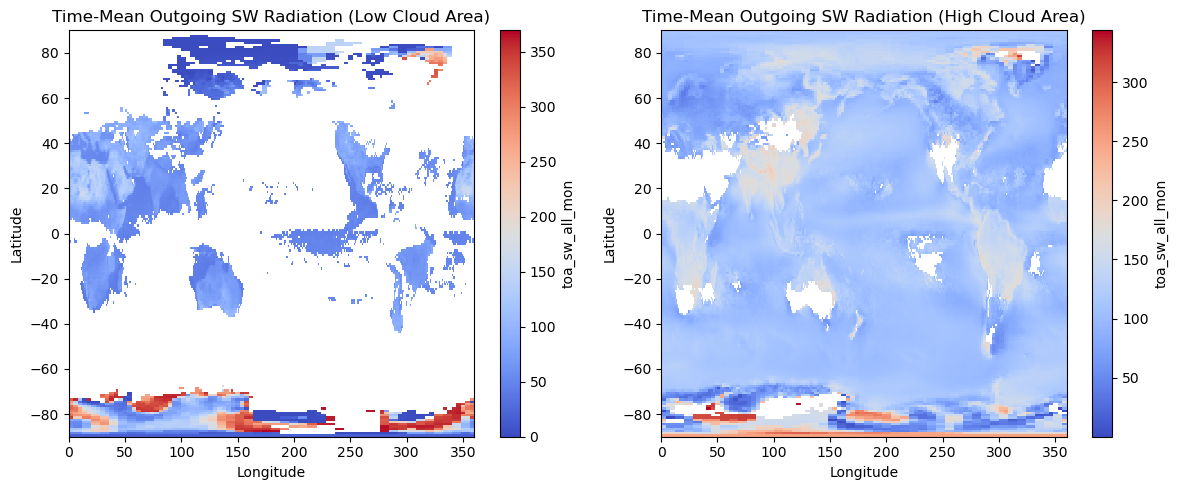

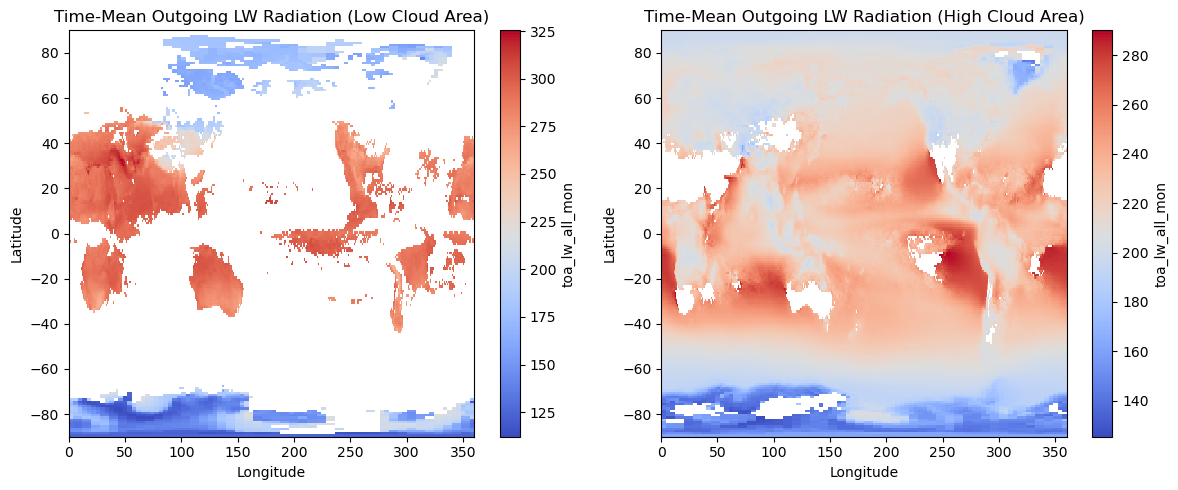

In [15]:
# PS3.2.4
#先用where函数区分出低云和高云区域，再求其时间上的平均值，最后进行绘图
cloud_area = ds['cldarea_total_daynight_mon']  

low_cloud_area = cloud_area <= 25  
high_cloud_area = cloud_area >= 75  


toa_sw_low = toa_sw_all.where(low_cloud_area).mean(dim='time')
toa_sw_high = toa_sw_all.where(high_cloud_area).mean(dim='time')

toa_lw_low = toa_lw_all.where(low_cloud_area).mean(dim='time')
toa_lw_high = toa_lw_all.where(high_cloud_area).mean(dim='time')


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
toa_sw_low.plot(cmap='coolwarm')
plt.title('Time-Mean Outgoing SW Radiation (Low Cloud Area)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
toa_sw_high.plot(cmap='coolwarm')
plt.title('Time-Mean Outgoing SW Radiation (High Cloud Area)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
toa_lw_low.plot(cmap='coolwarm')
plt.title('Time-Mean Outgoing LW Radiation (Low Cloud Area)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
toa_lw_high.plot(cmap='coolwarm')
plt.title('Time-Mean Outgoing LW Radiation (High Cloud Area)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

In [16]:
# PS3.2.5
#对高云区域和低云区域计算其范围上的平均值，发现云对短波辐射起到增强作用，云的覆盖度越高，该区域短波辐射值越大；
# 云对长波辐射起到削弱作用，云的覆盖度越低，该区域长波辐射值越大

toa_sw_low_global_mean = toa_sw_low.mean(dim=('lat', 'lon'))
toa_sw_high_global_mean = toa_sw_high.mean(dim=('lat', 'lon'))

toa_lw_low_global_mean = toa_lw_low.mean(dim=('lat', 'lon'))
toa_lw_high_global_mean = toa_lw_high.mean(dim=('lat', 'lon'))

print(f"低云区域中短波辐射的全球平均值: {toa_sw_low_global_mean.item()} W/m^2")
print(f"高云区域中短波辐射的全球平均值: {toa_sw_high_global_mean.item()} W/m^2")
print(f"低云区域中长波辐射的全球平均值: {toa_lw_low_global_mean.item()} W/m^2")
print(f"高云区域中长波辐射的全球平均值: {toa_lw_high_global_mean.item()} W/m^2")

# 云对短波辐射起到增强作用，云的覆盖度越高，该区域短波辐射值越大；
# 云对长波辐射起到削弱作用，云的覆盖度越低，该区域长波辐射值越大

低云区域中短波辐射的全球平均值: 88.81645202636719 W/m^2
高云区域中短波辐射的全球平均值: 114.74327850341797 W/m^2
低云区域中长波辐射的全球平均值: 233.0670166015625 W/m^2
高云区域中长波辐射的全球平均值: 215.3734893798828 W/m^2


### 2.1 从绘制图像正确，验证了辐射平衡。
### 2.2 计算正确，能量守恒。
### 2.3 需要计算辐射总量，单位为W。
### 2.4 图像绘制正确。
### 2.5 计算注意要进行面积加权。进行了分析。
### 得分：28/30

### =============================

# 3. Explore a netCDF dataset

In [28]:
# Open a netCDF4 file
ds = xr.open_dataset("landsurfacetemperature.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:              (time: 24, bnds: 2, lon: 360, lat: 150)
Coordinates:
  * time                 (time) datetime64[ns] 1980-01-01 ... 1981-12-01
  * lon                  (lon) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
  * lat                  (lat) float32 -59.5 -58.5 -57.5 ... 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables: (12/35)
    time_bnds            (time, bnds) datetime64[ns] ...
    Swnet_tavg           (time, lat, lon) float32 ...
    Lwnet_tavg           (time, lat, lon) float32 ...
    Qle_tavg             (time, lat, lon) float32 ...
    Qh_tavg              (time, lat, lon) float32 ...
    Qg_tavg              (time, lat, lon) float32 ...
    ...                   ...
    Rainf_f_tavg         (time, lat, lon) float32 ...
    Tair_f_inst          (time, lat, lon) float32 ...
    Qair_f_inst          (time, lat, lon) float32 ...
    Psurf_f_inst         (time, lat, lon) float32 ...
    SWdown_f_tavg        (time, lat, lon) float32 ...
    LWdown_f_tavg        (time, lat, lon) float32 ...
Attributes: (12/19)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2020-07-23T02:11:36.219
    source:                 VIC_v4.1.2 forced with Princeton_V2.2
    institution:            NASA GSFC
    missing_value:          -9999.0
    ...                     ...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  -59.5
    SOUTH_WEST_CORNER_LON:  -179.5
    DX:                     1.0
    DY:                     1.0
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

Text(0, 0.5, 'Temperature  Anomaly in Degrees K')

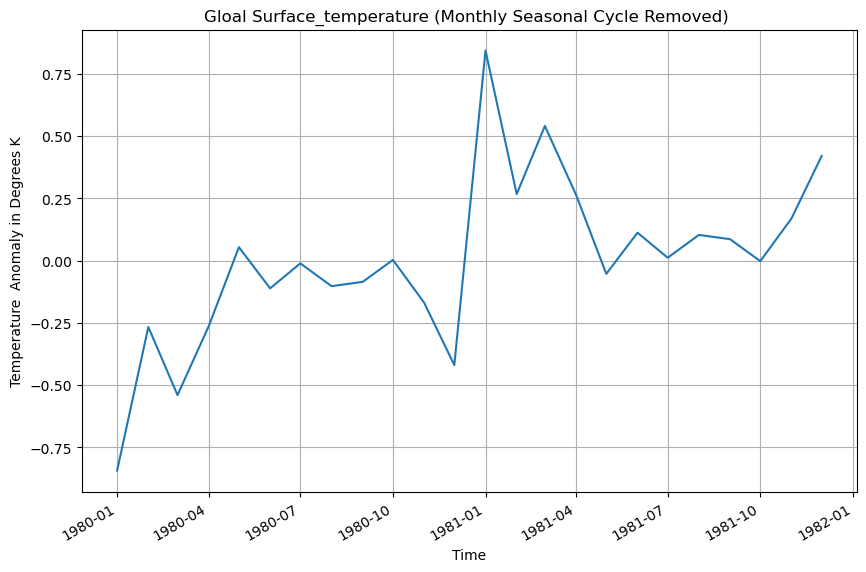

In [62]:
#PS3.3.1 绘制地表温度时间序列图
#先计算地表温度的每个月的平均值，再用源数据减去月平均值，即可获得剔除月季循环后的地表温度，再求全区域上的地表温度平均值进行绘图
surface_temperature = ds['AvgSurfT_inst']
air_temperature = ds['Tair_f_inst']
surface_temperature
group_data = surface_temperature.groupby('time.month')
surface_temperature_anom = group_data - group_data.mean(dim='time')
plt.figure(figsize=(10, 6))
surface_temperature_anom.mean(dim=['lat', 'lon']).plot()
plt.title('Gloal Surface_temperature (Monthly Seasonal Cycle Removed) ')
plt.xlabel('Time')
plt.grid(True)
plt.ylabel('Temperature  Anomaly in Degrees K')

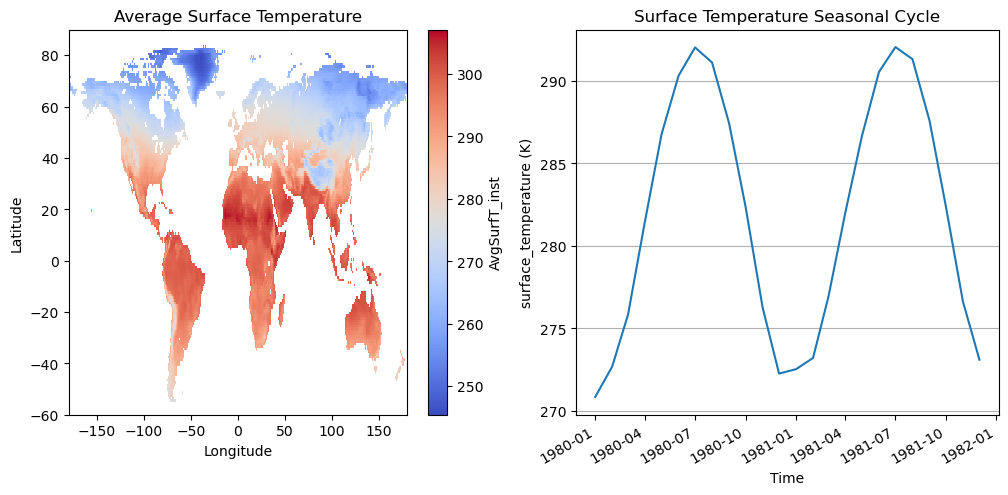

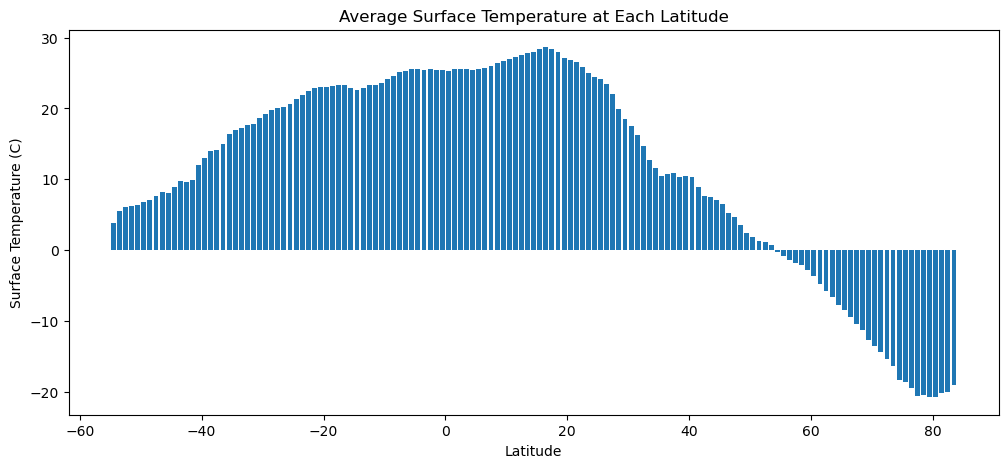

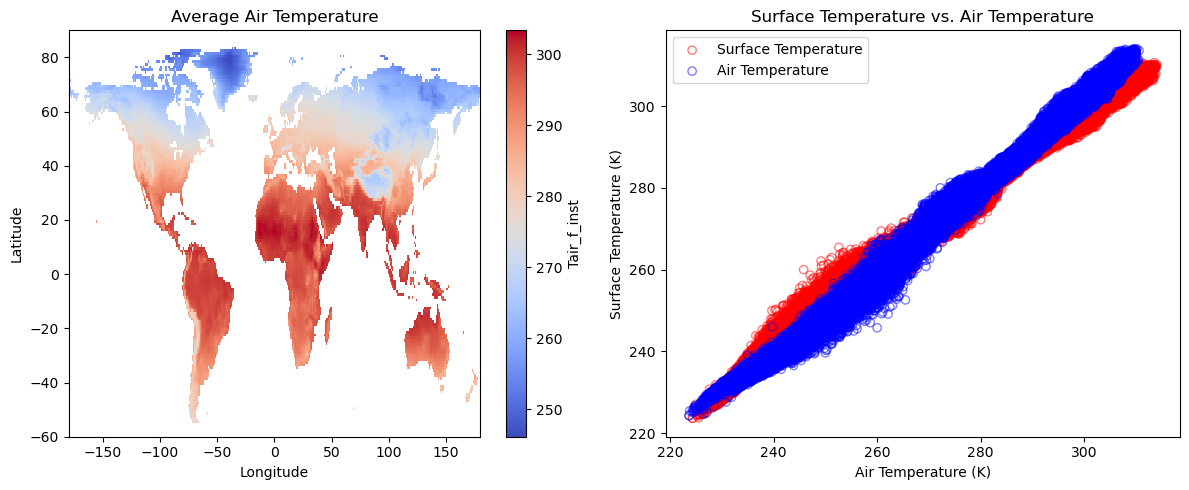

In [61]:
#PS3.3.2 
#图1绘制地表温度的2D图，图2绘制地表温度的季节循环图，先求全区的地表温度平均值再进行绘图，图3绘制每个纬度上的地表温度均值，
#图4绘制空气温度的2D图，图5绘制地表温度与空气温度的散点图进行对比
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
surface_temperature.mean(dim='time').plot(cmap='coolwarm')
plt.title('Average Surface Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
group_data.mean(dim=['lat', 'lon']).plot()
plt.title('Surface Temperature Seasonal Cycle')
plt.xlabel('Time')
plt.ylabel('surface_temperature (K)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(ds['lat'].values,surface_temperature.mean(dim=('time', 'lon'))-273.15)
plt.title('Average Surface Temperature at Each Latitude')
plt.xlabel('Latitude')
plt.ylabel('Surface Temperature (C)')
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
air_temperature.mean(dim='time').plot(cmap='coolwarm')
plt.title('Average Air Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
plt.scatter(surface_temperature.values, air_temperature.values, color='red', alpha=0.5, edgecolors='red', facecolors='none', label='Surface Temperature')
plt.scatter(air_temperature.values, surface_temperature.values, color='blue', alpha=0.5, edgecolors='blue', facecolors='none', label='Air Temperature')
plt.title('Surface Temperature vs. Air Temperature')
plt.xlabel('Air Temperature (K)')
plt.ylabel('Surface Temperature (K)')
plt.legend()
plt.tight_layout()
plt.show()

### 3.1 满足题目要求。
### 3.2 满足题目要求。
### 得分：11/10

### =============================